## <p style="text-align: center;">☁️FARMTECH NA ERA DA CLOUD COMPUTING☁️</p>
##### <p style="text-align: center;">GRUPO 15: Iolanda Manzali, Jônatas Gomes , Murilo Carone, Pedro Sousa e Yago Iama<p></p>

### <p style="text-align: center;">ENTREGA l </p>
###### * Fazer uma análise exploratoria do dataset 'crop_yeld.csv'
###### * Encontrar tendencia para o rendimenTo das plantações, por meio de clusterizações e identificar se há cenários descrepantes
###### * Fazer 5 modelos preditivos

### 1. ANÁLISE EXPLORATÓRIA

###### 1.1 IMPORTANDO AS BIBLIOTECAS E MÓDULOS NECESSÁRIOS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


###### 1.2 CARREGANDO O DATASET 'crop_yeld.csv'

In [4]:
df = pd.read_csv('crop_yield.csv')

In [5]:
display(df)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


In [6]:
display(df.head(10))

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
5,"Cocoa, beans",2339.30,17.70,84.54,25.76,8850
6,"Cocoa, beans",2326.09,18.09,84.63,26.11,9003
7,"Cocoa, beans",2718.08,18.30,85.43,26.12,9880
8,"Cocoa, beans",2061.61,17.80,84.36,25.88,9201
9,"Cocoa, beans",1934.62,17.94,83.43,26.21,8300


###### 1.3 VISUALIZAÇÃO E TRATAMENTO DO DATASET

In [7]:
display(df.sample(10))

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
43,Oil palm fruit,2344.72,17.61,84.12,25.76,178183
70,Oil palm fruit,2771.73,18.38,84.98,26.30,186959
7,"Cocoa, beans",2718.08,18.30,85.43,26.12,9880
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
102,"Rice, paddy",2363.63,18.35,84.92,26.28,34221
30,"Cocoa, beans",2938.29,18.22,85.42,26.06,10737
37,"Cocoa, beans",2333.46,18.50,84.85,26.43,9502
119,"Rubber, natural",2301.54,17.81,82.79,26.24,9866
5,"Cocoa, beans",2339.30,17.70,84.54,25.76,8850


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [9]:
df.isnull().sum()


,0
Crop,0
Precipitation (mm day-1),0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Temperature at 2 Meters (C),0
Yield,0


In [10]:
duplicates = df.duplicated().sum()
print(f'O número de dados duplicados é: {duplicates}')

O número de dados duplicados é: 0


###### 1.4 MEDIDAS DE TENDENCIA CENTRAL E QUARTIS DO DATASET

In [11]:
display(df.describe())

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


###### Convertendo obj 'crop' em dado numérico

In [12]:
df['Crop'].unique()
mapping = {'Cocoa, beans': 1, 'Rice, paddy': 2, 'Oil palm fruit': 3, 'Rubber, natural': 4}
df['Crop'] = df['Crop'].map(mapping)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    int64  
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.4 KB


In [14]:
display(df)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,1,2248.92,17.72,83.40,26.01,11560
1,1,1938.42,17.54,82.11,26.11,11253
2,1,2301.54,17.81,82.79,26.24,9456
3,1,2592.35,17.61,85.07,25.56,9321
4,1,2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,4,2308.51,18.27,83.65,26.47,6721
152,4,2410.13,18.58,83.45,26.81,6248
153,4,2967.41,18.67,85.48,26.46,6842
154,4,2333.46,18.50,84.85,26.43,5571


###### VERIFICANDO A PRESENÇA DE OUTLIERS

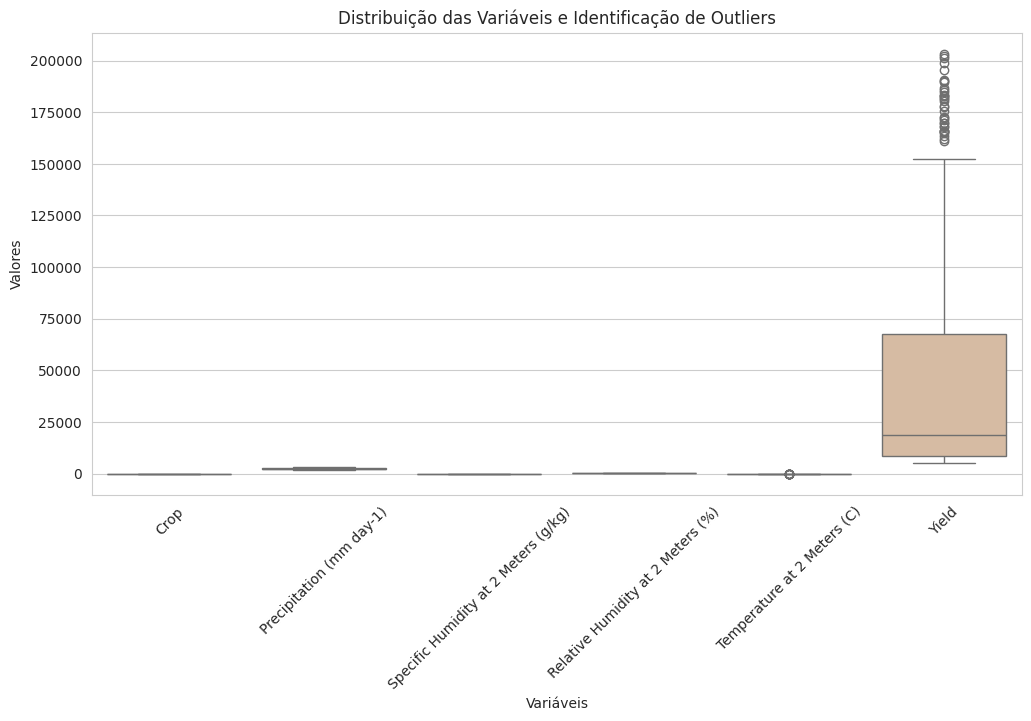

In [15]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='pastel')
plt.title('Distribuição das Variáveis e Identificação de Outliers')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

###### 1.5 VISUALIZAÇÃO GRÁFICA

###### Separando os dados por cultura e configurando as cores para cada cultura

###### Variável Climática e Rendimento

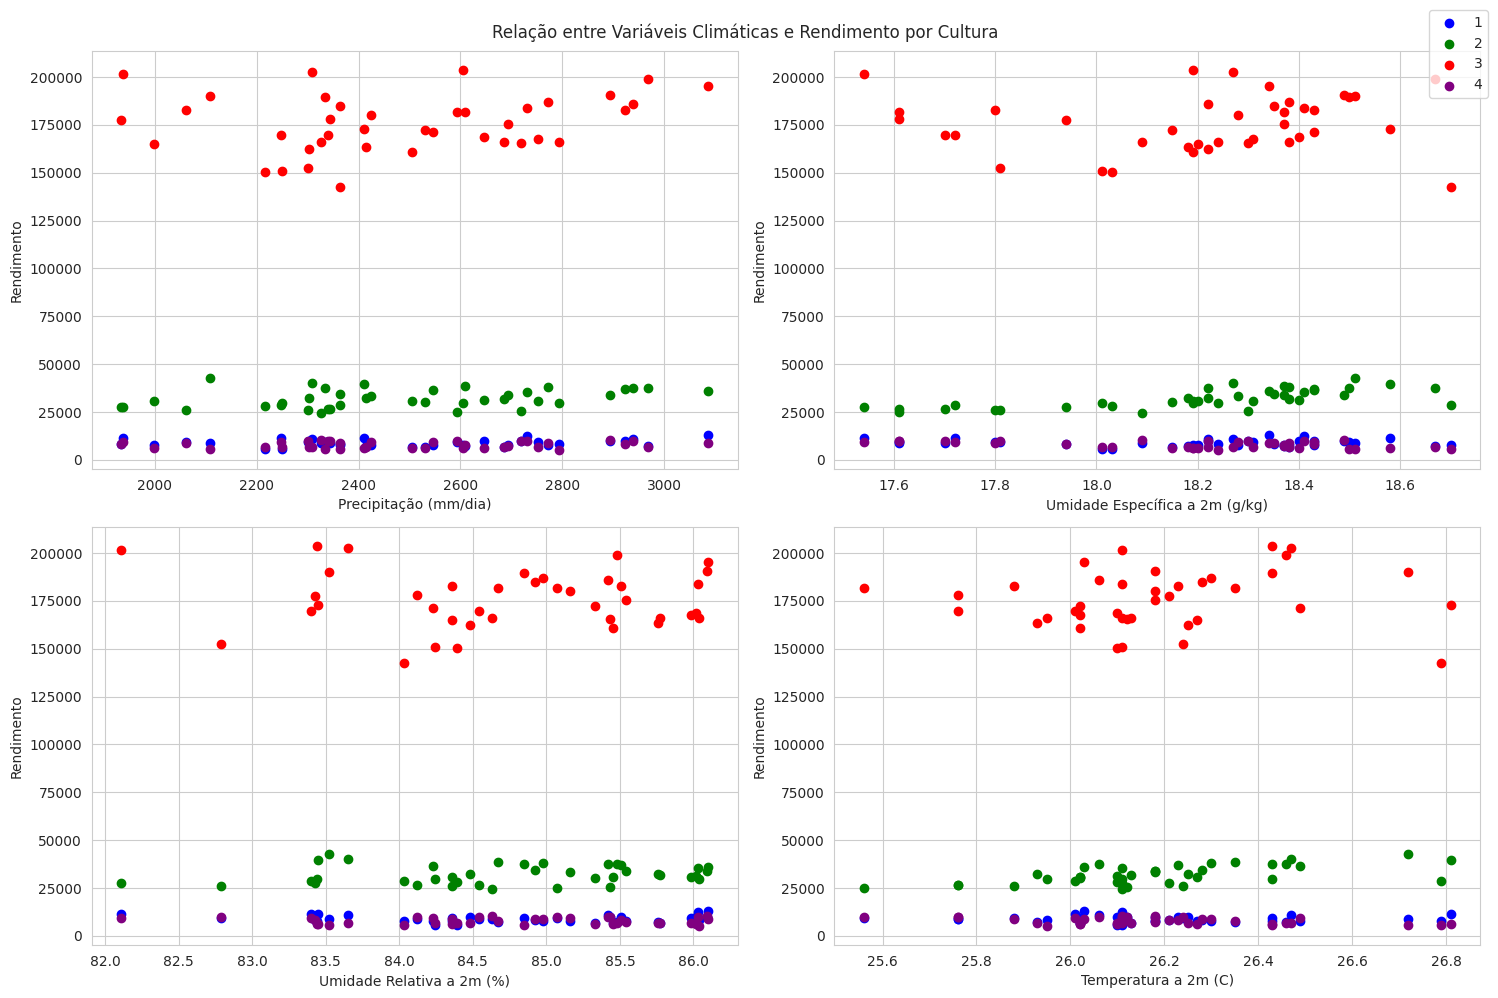

In [16]:

# Definindo as cores para cada cultura
colors = {
    '1': 'blue',  # Cocoa, beans
    '2': 'green',  # Rice, paddy
    '3': 'red',  # Oil palm fruit
    '4': 'purple'  # Rubber, natural
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relação entre Variáveis Climáticas e Rendimento por Cultura')

# Plotando os dados para cada cultura
for crop in mapping.values():
    crop_df = df[df['Crop'] == crop]
    axes[0, 0].scatter(crop_df['Precipitation (mm day-1)'], crop_df['Yield'], color=colors[str(crop)], label=crop)
    axes[0, 1].scatter(crop_df['Specific Humidity at 2 Meters (g/kg)'], crop_df['Yield'], color=colors[str(crop)], label=crop)
    axes[1, 0].scatter(crop_df['Relative Humidity at 2 Meters (%)'], crop_df['Yield'], color=colors[str(crop)], label=crop)
    axes[1, 1].scatter(crop_df['Temperature at 2 Meters (C)'], crop_df['Yield'], color=colors[str(crop)], label=crop)

# Configurando rótulos dos eixos
axes[0, 0].set_xlabel('Precipitação (mm/dia)')
axes[0, 0].set_ylabel('Rendimento')
axes[0, 1].set_xlabel('Umidade Específica a 2m (g/kg)')
axes[0, 1].set_ylabel('Rendimento')
axes[1, 0].set_xlabel('Umidade Relativa a 2m (%)')
axes[1, 0].set_ylabel('Rendimento')
axes[1, 1].set_xlabel('Temperatura a 2m (C)')
axes[1, 1].set_ylabel('Rendimento')

# Adicionando legenda
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Ajustando o layout
plt.tight_layout()
plt.show()



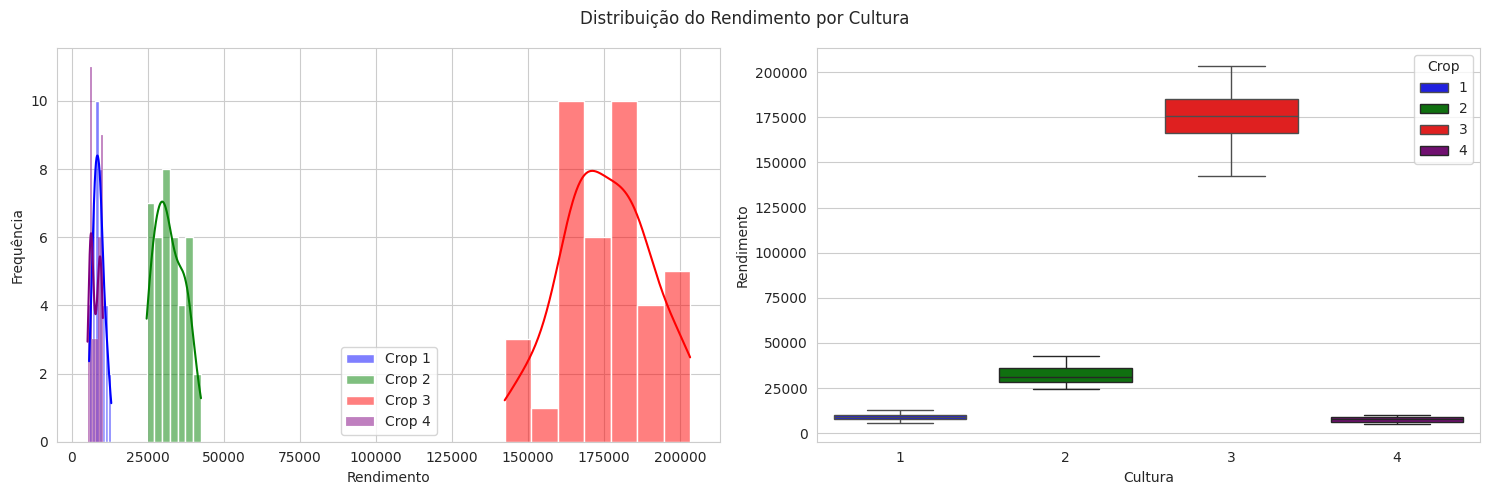

In [17]:
# Histogramas e boxplots para rendimento por cultura
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribuição do Rendimento por Cultura')

for crop in mapping.values():
    crop_df = df[df['Crop'] == crop]
    sns.histplot(crop_df['Yield'], kde=True, label=f'Crop {crop}', ax=axes[0], color=colors[str(crop)])
    sns.boxplot(x='Crop', hue = 'Crop', y='Yield', data=df[df['Crop'] == crop], ax=axes[1], palette=[colors[str(crop)]], showfliers=False)

axes[0].set_xlabel('Rendimento')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[1].set_xlabel('Cultura')
axes[1].set_ylabel('Rendimento')

plt.tight_layout()
plt.show()



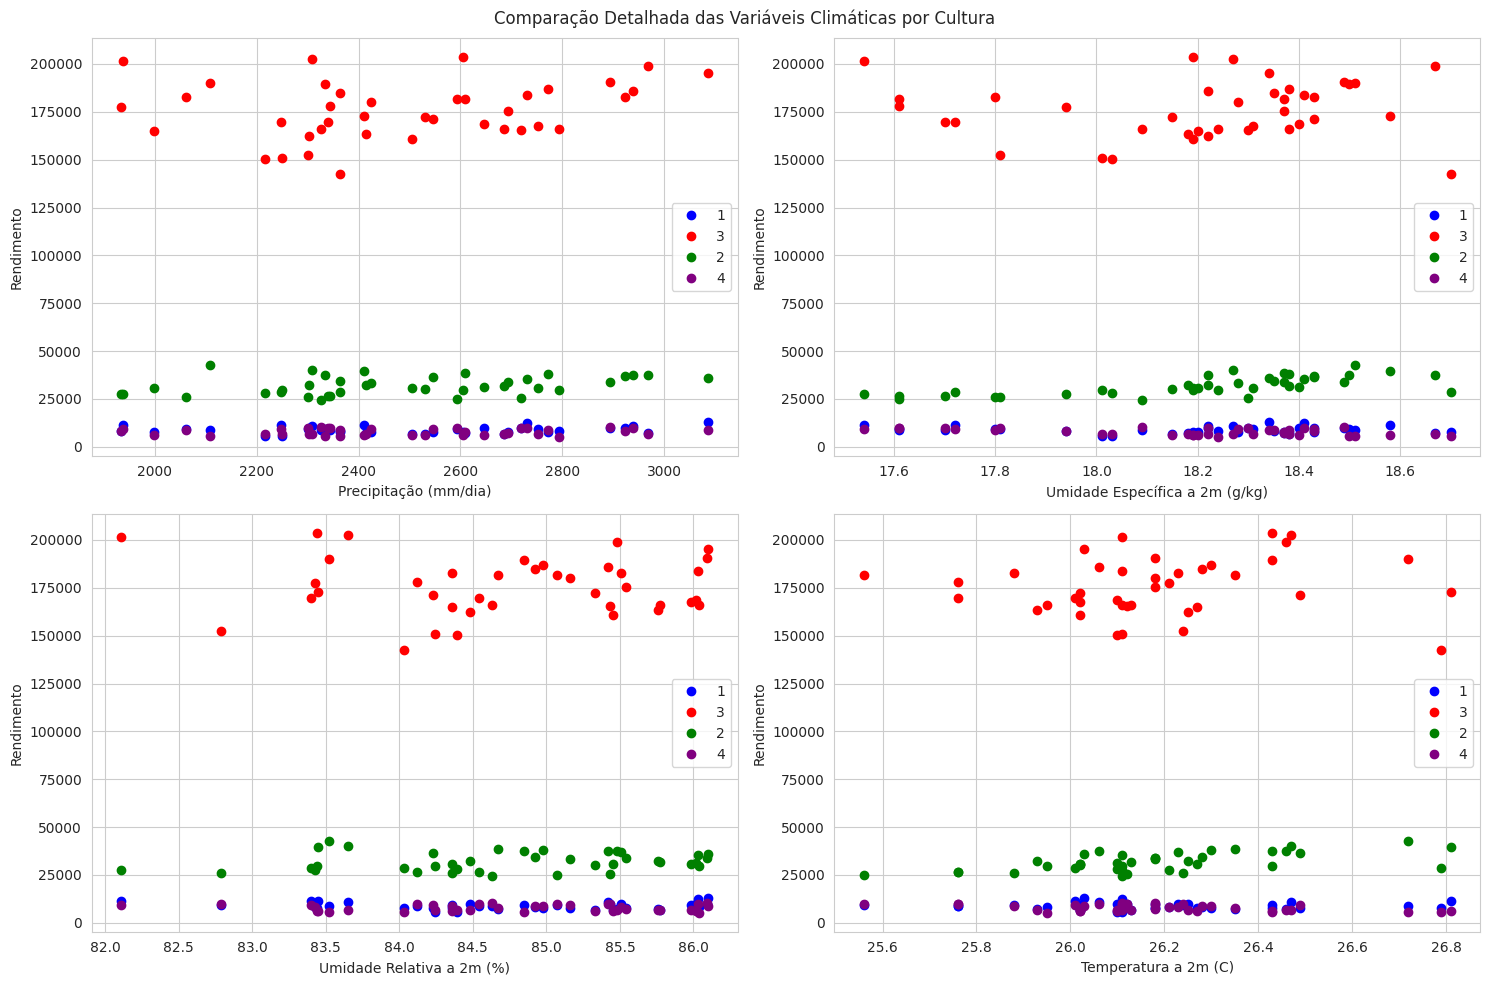

In [18]:
# Definindo as culturas
crops = df['Crop'].unique()

# Gráficos com zoom para comparação detalhada
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparação Detalhada das Variáveis Climáticas por Cultura')

for i, crop in enumerate(crops):
    crop_data = df[df['Crop'] == crop]
    axes[0, 0].plot(crop_data['Precipitation (mm day-1)'], crop_data['Yield'], 'o', color=colors[str(crop)], label=crop)
    axes[0, 1].plot(crop_data['Specific Humidity at 2 Meters (g/kg)'], crop_data['Yield'], 'o', color=colors[str(crop)], label=crop)
    axes[1, 0].plot(crop_data['Relative Humidity at 2 Meters (%)'], crop_data['Yield'], 'o', color=colors[str(crop)], label=crop)
    axes[1, 1].plot(crop_data['Temperature at 2 Meters (C)'], crop_data['Yield'], 'o', color=colors[str(crop)], label=crop)

axes[0, 0].set_xlabel('Precipitação (mm/dia)')
axes[0, 0].set_ylabel('Rendimento')
axes[0, 1].set_xlabel('Umidade Específica a 2m (g/kg)')
axes[0, 1].set_ylabel('Rendimento')
axes[1, 0].set_xlabel('Umidade Relativa a 2m (%)')
axes[1, 0].set_ylabel('Rendimento')
axes[1, 1].set_xlabel('Temperatura a 2m (C)')
axes[1, 1].set_ylabel('Rendimento')

for ax in axes.flat:
    ax.legend()

plt.tight_layout()
plt.show()



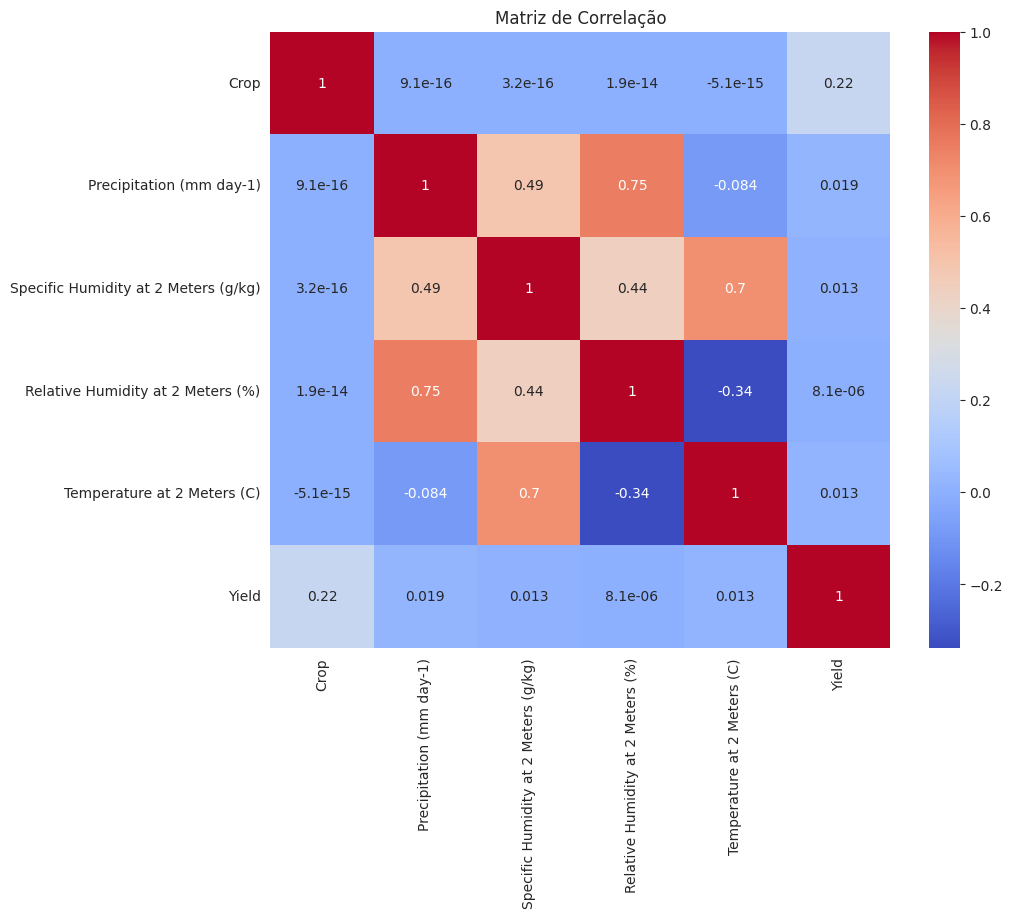

In [19]:
# Matriz de correlação
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

###### 1.5 CONCLUSOES ANALISE EXPLORATORIA
###### * Cultura 1(Cocoa, beans): Nota-se correlação negativa entre os níveis de precipitação e o rendimento da cultura, sugerindo que o aumento na precipitação pode impactar negativamente na sua produtividade. Por outro lado, tanto a umidade específica quanto a umidade relativa apresentaram correlação positiva com o rendimento, indicando que condições de maior umidade parecem favorecer a produção.  
###### * Cultura 2 (Rice, paddy): Observa-se correlação positiva entre a umidade relativa e o rendimento, portanto ambientes com maior umidade relativa podem ser mais favoráveis ao cultivo de arroz.
###### * Cultura 3 (Oil palm fruit): A análise indica uma correlação positiva entre a temperatura e o rendimento, sugerindo que temperaturas mais elevadas podem estar associadas a melhor produtividade.
###### * Cultura 4 (Rubber, natural): Os dados mostram uma correlação negativa entre a temperatura e o rendimento, indicando que temperaturas mais altas estão mais associadas a uma redução na produção da borracha natural.


### 2. ML NÃO SUPERVISIONADO (CLUSTERIZAÇÃO)

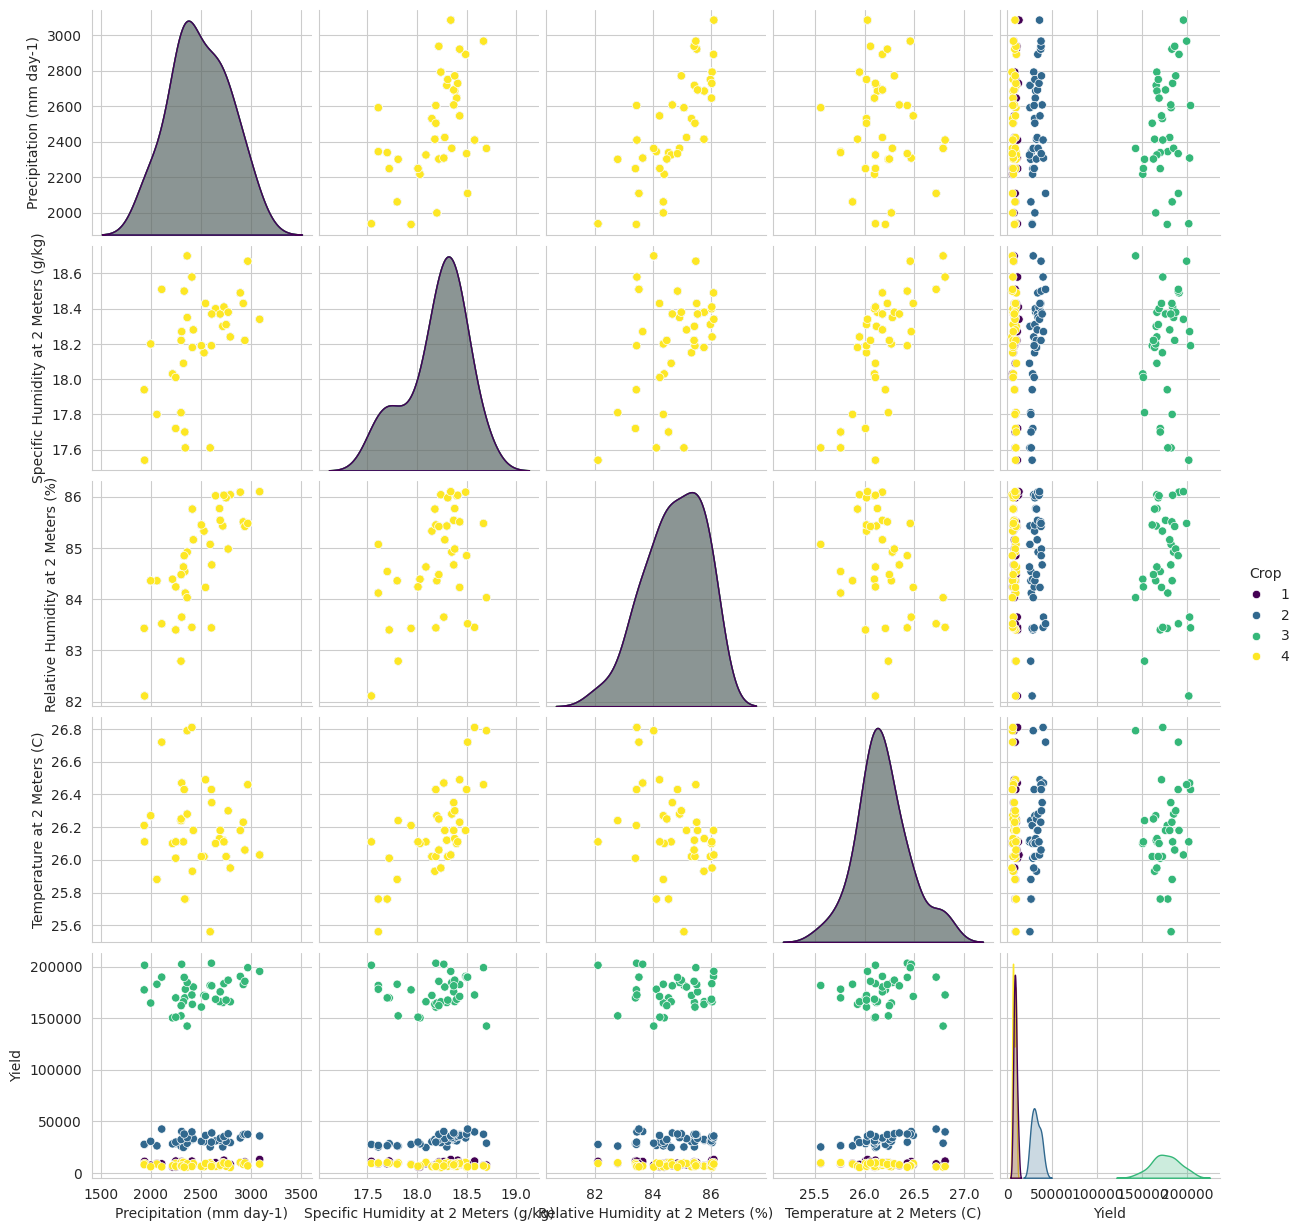

In [20]:
sns.pairplot(df, hue='Crop', diag_kind='kde', palette='viridis')
plt.show()

###### 2.1 PREPARAÇÃO DOS DADOS

In [21]:
# Selecionando as variáveis de interesse
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
X = df[features]



In [22]:
# Transformando os dados para a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###### 2.2 Elbow Method

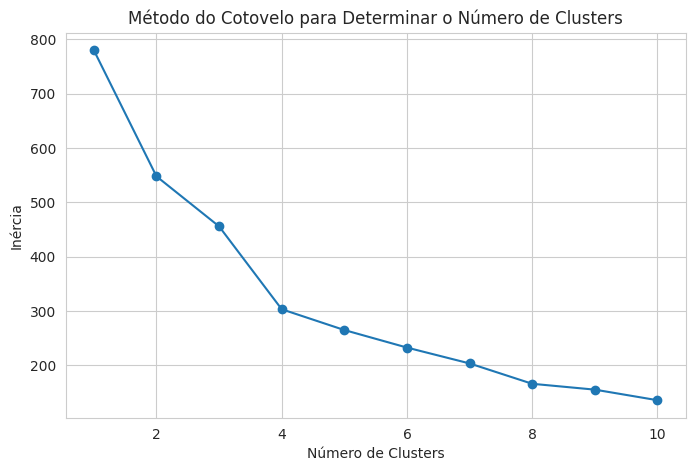

In [23]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [24]:
# Escolhendo o número de clusters com base no Elbow Method
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

###### 2.3 PCA

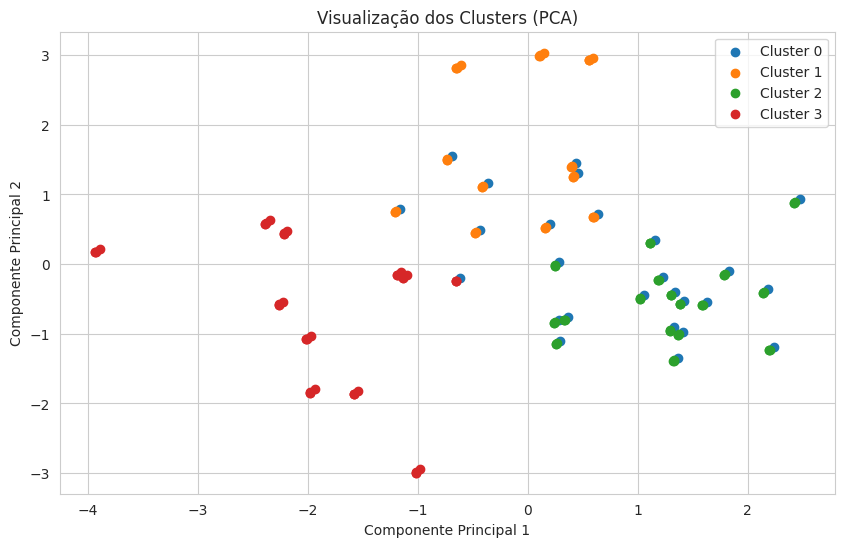

In [25]:
# Utilizando PCA para redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.title('Visualização dos Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['Yield'])
y = df['Yield']
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Modelo de Regressão Linear sem PCA
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
# Prever e calcular o erro (sem PCA)
y_pred_no_pca = regressor.predict(X_test_scaled)
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
print(f"Erro Quadrático Médio sem PCA: {mse_no_pca}")
# Aplicar PCA para reduzir a dimensionalidade antes do treinamento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Modelo de Regressão Linear com PCA
regressor_pca = LinearRegression()
regressor_pca.fit(X_train_pca, y_train)
# Prever e calcular o erro (com PCA)
y_pred_pca = regressor_pca.predict(X_test_pca)
mse_with_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Erro Quadrático Médio com PCA: {mse_with_pca}")
# Comparando os resultados
if mse_no_pca < mse_with_pca:
    print("O modelo sem PCA teve um desempenho melhor.")
else:
    print("O modelo com PCA teve um desempenho melhor.")

Erro Quadrático Médio sem PCA: 1387056297.455145
Erro Quadrático Médio com PCA: 3694429031.9090853
O modelo sem PCA teve um desempenho melhor.


###### 2.4 DBSCAN

Cenários discrepantes (outliers):


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster,Outlier
0,1,2248.92,17.72,83.40,26.01,11560,3,-1
1,1,1938.42,17.54,82.11,26.11,11253,3,-1
2,1,2301.54,17.81,82.79,26.24,9456,3,-1
3,1,2592.35,17.61,85.07,25.56,9321,3,-1
4,1,2344.72,17.61,84.12,25.76,8800,3,-1
...,...,...,...,...,...,...,...,...
151,4,2308.51,18.27,83.65,26.47,6721,1,-1
152,4,2410.13,18.58,83.45,26.81,6248,1,-1
153,4,2967.41,18.67,85.48,26.46,6842,2,-1
154,4,2333.46,18.50,84.85,26.43,5571,1,-1


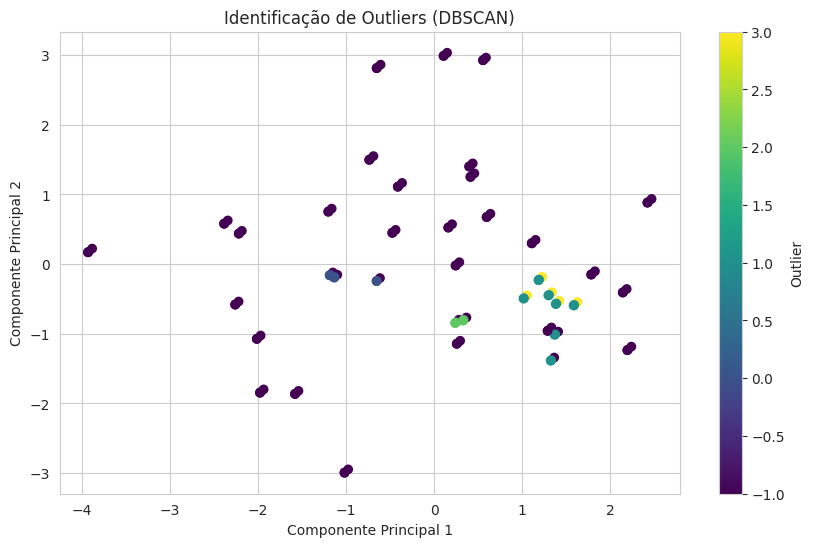

In [28]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Outlier'] = dbscan.fit_predict(X_scaled)
outliers = df[df['Outlier'] == -1]

print("Cenários discrepantes (outliers):")
display(outliers)

# Visualização dos outliers
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Outlier'], cmap='viridis', marker='o')
plt.title('Identificação de Outliers (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Outlier')
plt.show()



###### 2.6 ANÁLISE DOS CLUSTERS E OUTLIERS

In [29]:
# Análise dos clusters e outliers
print("Estatísticas descritivas por cluster:")
display(df.groupby('Cluster')[features].mean())

print("\nEstatísticas descritivas dos outliers:")
display(outliers[features].describe())

Estatísticas descritivas por cluster:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
Cluster,,,,,
0,2610.111154,18.321538,85.204615,26.196154,178310.153846
1,2353.613333,18.409722,84.105556,26.505278,29671.416667
2,2733.517647,18.337647,85.652353,26.118824,16624.000000
3,2230.034186,17.798837,83.899767,25.983488,51344.744186



Estatísticas descritivas dos outliers:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,115.000000,115.000000,115.000000,115.000000,115.00000
mean,2451.181217,18.184174,84.484696,26.218174,63948.06087
std,310.622385,0.330621,0.986871,0.294540,74339.77837
min,1934.620000,17.540000,82.110000,25.560000,5571.00000
25%,2301.540000,17.940000,83.650000,26.030000,8853.50000
50%,2363.630000,18.240000,84.480000,26.230000,26399.00000
75%,2607.960000,18.430000,85.160000,26.430000,161551.00000
max,3085.790000,18.700000,86.100000,26.810000,203399.00000


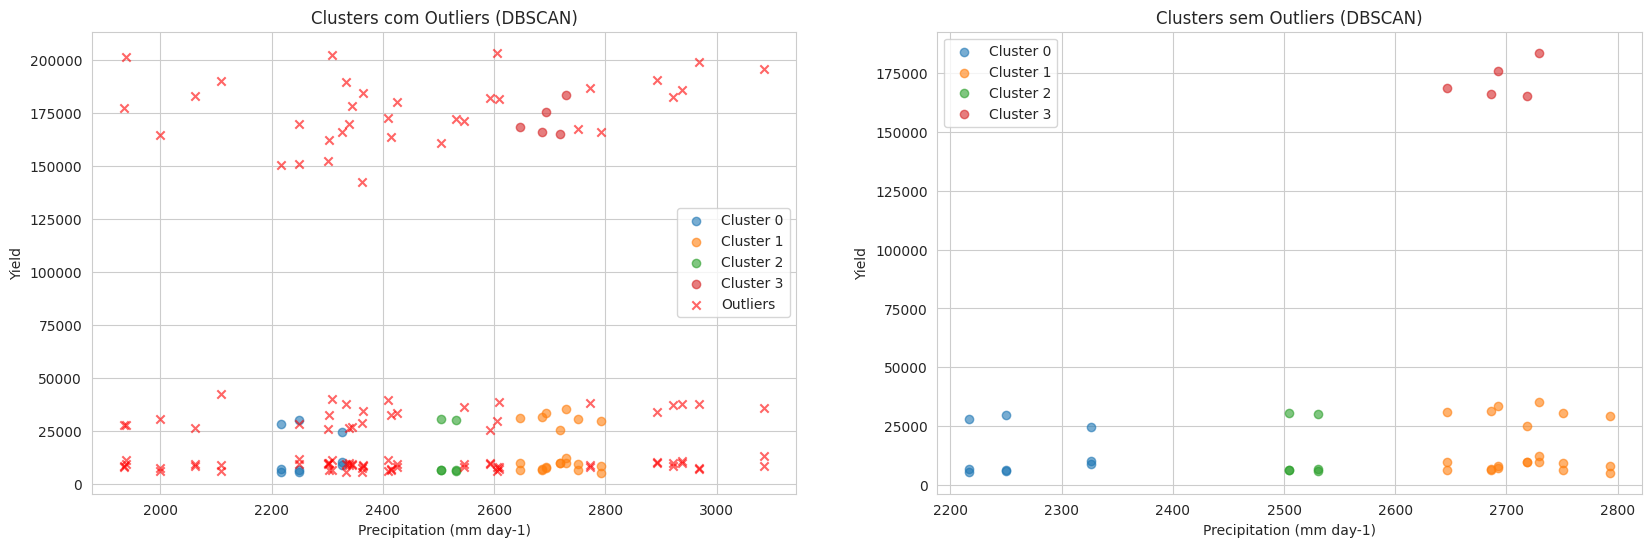

In [30]:
# Selecionar as colunas numéricas para o clustering
features = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
               'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']]

# Normalizar os dados (DBSCAN é sensível à escala)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps e min_samples conforme necessário
dbscan_labels = dbscan.fit_predict(features_normalized)

# Adicionar os rótulos ao DataFrame
df['Cluster'] = dbscan_labels

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1: Com outliers
for cluster in np.unique(dbscan_labels):
    if cluster != -1:  # Ignorar outliers
        ax1.scatter(df[dbscan_labels == cluster]['Precipitation (mm day-1)'],
                    df[dbscan_labels == cluster]['Yield'],
                    label=f'Cluster {cluster}', alpha=0.6)

# Plotar os outliers (cluster -1) com uma cor/marcador diferente
outliers = df[dbscan_labels == -1]
ax1.scatter(outliers['Precipitation (mm day-1)'], outliers['Yield'],
            color='red', marker='x', label='Outliers', alpha=0.6)

ax1.set_xlabel('Precipitation (mm day-1)')
ax1.set_ylabel('Yield')
ax1.set_title('Clusters com Outliers (DBSCAN)')
ax1.legend()

# Gráfico 2: Sem outliers
for cluster in np.unique(dbscan_labels):
    if cluster != -1:  # Ignorar outliers
        ax2.scatter(df[dbscan_labels == cluster]['Precipitation (mm day-1)'],
                    df[dbscan_labels == cluster]['Yield'],
                    label=f'Cluster {cluster}', alpha=0.6)

ax2.set_xlabel('Precipitation (mm day-1)')
ax2.set_ylabel('Yield')
ax2.set_title('Clusters sem Outliers (DBSCAN)')
ax2.legend()

plt.show()

###### 2.6 CONCLUSOES ML NAO SUPERVISIONADO
###### A análise de clusterização aplicada ao DATASET permitiu a identificação de alguns padrões e tendências, bem como de cenários discrepantes. Ao utilizarmos os algoritmos K-Means, DBSCAN e PCA, os dados foram redimensionados e clusterizados em grupos homogêneos a partir das variáveis climáticas e do rendimento.

###### * Resultados  da clusterização:
######    ** Cluster 1: Condições Úmidas e Rendimento Moderado, com altos níveis de precipitação e umidade relativa e com temperaturas moderadas. Cocoa, beans e Rice, paddy são predominantes neste cluster e condições ambientais de excessiva umidade podem impactar negativamente o rendimento.
######    ** Cluster 2: Clima Quente e Alto Rendimento, com altas temperaturas e baixa umidade relativa, ideal para oil palm fruit.
######    ** Cluster 3: Condições Secas e Rendimento Variável, com baixas precipitação e umidade relativa e temperaturas moderadas. A falta de umidade pode ser um fator limitante para o rendimento, especialmente para culturas que dependem de condições mais úmidas, como a borracha natural.
######    ** Cluster 4: Condições Ideais e Rendimento Elevado (Precipitação equilibrada, umidade relativa alta e temperaturas amenas). Este cluster representa o equilíbrio ideal entre umidade e temperatura, resultando em altos rendimentos para culturas como o arroz e o cacau.

###### Essa informação é importante para desenvolver estratégias agrícolas mais eficientes, adaptadas às condições climáticas de cada região, contribuindo para a sustentabilidade do setor agrícola.

###### * Resultados dos outliers:
######    ** Esses cenários discrepantes podem ser atribuídos a várias causas, incluindo:
######        *** Condições Climáticas Extremas (seca intensa ou chuvas torrenciais, por exemplo)
######        *** Falta de dados ou erros de medição (falhas em sensores, erros de registro de entrada de dados, etc.)
######        *** Praticas agricolas (praticas de cultivo inadequadas, uso incorreto de insumos, etc.)


### 3. MODELOS PREDITIVOS

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Função para avaliar o modelo com múltiplas métricas
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R²: {r2:.2f}')

# Função para realizar validação cruzada
def cross_validate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    print(f'Cross-Validation MSE: {np.mean(mse_scores):.2f} (± {np.std(mse_scores):.2f})')
    print(f'Cross-Validation MAE: {np.mean(mae_scores):.2f} (± {np.std(mae_scores):.2f})')
    print(f'Cross-Validation R²: {np.mean(r2_scores):.2f} (± {np.std(r2_scores):.2f})')

###### 3.1 Regressão Linear

In [32]:
# Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de Regressão Linear:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de Regressão Linear:")
cross_validate_model(model, X, y)

Avaliação do Modelo de Regressão Linear:
MSE: 1387056297.45
MAE: 29774.50
R²: 0.64

Validação Cruzada do Modelo de Regressão Linear:
Cross-Validation MSE: 3133237603.91 (± 959435931.95)
Cross-Validation MAE: 41593.02 (± 6451.02)
Cross-Validation R²: 0.37 (± 0.14)


###### 3.2 Árvore de Decisão

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Criando e treinando o modelo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de Árvore de Decisão:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de Árvore de Decisão:")
cross_validate_model(model, X, y)

Avaliação do Modelo de Árvore de Decisão:
MSE: 58730225.09
MAE: 3969.66
R²: 0.98

Validação Cruzada do Modelo de Árvore de Decisão:
Cross-Validation MSE: 487202247.76 (± 529927291.72)
Cross-Validation MAE: 7921.98 (± 3971.93)
Cross-Validation R²: 0.90 (± 0.11)


###### 3.3 Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Criando e treinando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de Random Forest:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de Random Forest:")
cross_validate_model(model, X, y)

Avaliação do Modelo de Random Forest:
MSE: 54065537.88
MAE: 3899.86
R²: 0.99

Validação Cruzada do Modelo de Random Forest:
Cross-Validation MSE: 290963900.92 (± 263504866.49)
Cross-Validation MAE: 8977.01 (± 3776.75)
Cross-Validation R²: 0.94 (± 0.06)


###### 3.4 SVR

In [38]:
# SVR com Kernel Linear
from sklearn.svm import SVR

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de SVR (Kernel Linear):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de SVR (Kernel Linear):")
cross_validate_model(model, X, y)

Avaliação do Modelo de SVR (Kernel Linear):
MSE: 5082969170.38
MAE: 38965.59
R²: -0.31

Validação Cruzada do Modelo de SVR (Kernel Linear):
Cross-Validation MSE: 6431205149.41 (± 1086398882.94)
Cross-Validation MAE: 49206.77 (± 6393.76)
Cross-Validation R²: -0.32 (± 0.16)


In [39]:
# SVR com Kernel Polinomial
# Criando e treinando o modelo
model = SVR(kernel='poly', degree=3)
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de SVR (Kernel Polinomial):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de SVR (Kernel Polinomial):")
cross_validate_model(model, X, y)

Avaliação do Modelo de SVR (Kernel Polinomial):
MSE: 5085574003.37
MAE: 38974.15
R²: -0.31

Validação Cruzada do Modelo de SVR (Kernel Polinomial):
Cross-Validation MSE: 6507310657.13 (± 1295118342.82)
Cross-Validation MAE: 48992.18 (± 6340.49)
Cross-Validation R²: -0.33 (± 0.17)


In [40]:
# SVR com Kernel RBF

# Criando e treinando o modelo
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de SVR (Kernel RBF):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de SVR (Kernel RBF):")
cross_validate_model(model, X, y)

Avaliação do Modelo de SVR (Kernel RBF):
MSE: 5085217905.53
MAE: 38972.76
R²: -0.31

Validação Cruzada do Modelo de SVR (Kernel RBF):
Cross-Validation MSE: 6507238546.13 (± 1295068485.51)
Cross-Validation MAE: 48991.97 (± 6340.42)
Cross-Validation R²: -0.33 (± 0.17)


###### 3.5 XGBoost

In [41]:
from xgboost import XGBRegressor

# Criando e treinando o modelo
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de XGBoost:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de XGBoost:")
cross_validate_model(model, X, y)

Avaliação do Modelo de XGBoost:
MSE: 42904584.00
MAE: 3556.86
R²: 0.99

Validação Cruzada do Modelo de XGBoost:
Cross-Validation MSE: 328929261.60 (± 359937413.40)
Cross-Validation MAE: 8043.54 (± 3512.52)
Cross-Validation R²: 0.93 (± 0.08)


###### 3.6 Resultados dos Modelos Preditivos

###### Salvando o dataframe dos resultados dos modelos preditivos

In [42]:
m_preditivos= {
    'Modelo': ['XGBoost', 'SVR (Kernel RBF)', 'SVR (Kernel Polinomial)', 'SVR (Kernel Linear)', 'Random Forest', 'Árvore de Decisão', 'Regressão Linear'],
    'MSE': [8500454400.00, 5085748341.65, 5085828861.84, 5086072592.41, 7405960032.91, 8525193206.32, 4162255539.84],
    'MAE': [75806.75, 38974.92, 38975.29, 38975.27, 72215.17, 75914.27, 55423.35],
    'R²': [-1.19, -0.31, -0.31, -0.31, -0.91, -1.20, -0.07],
    'Cross-Validation MSE': [9209779404.80, 6507239652.68, 6507345183.77, 6434647011.29, 8566059189.06, 9222714941.52, 5247017081.79],
    'Cross-Validation MSE (± Desvio)': ['± 726278286.68', '± 1295069466.77', '± 1295143022.66', '± 1085387237.40', '± 858310200.46', '± 722999415.53', '± 759704147.50'],
    'Cross-Validation MAE': [80638.60, 48991.97, 48992.28, 49211.91, 78423.84, 80693.05, 61695.36],
    'Cross-Validation MAE (± Desvio)': ['± 3439.89', '± 6340.42', '± 6340.52', '± 6392.21', '± 4477.93', '± 3422.62', '± 4546.37'],
    'Cross-Validation R²': [-0.90, -0.33, -0.33, -0.32, -0.76, -0.91, -0.07],
    'Cross-Validation R² (± Desvio)': ['± 0.18', '± 0.17', '± 0.17', '± 0.16', '± 0.12', '± 0.18', '± 0.03']
}

df = pd.DataFrame(m_preditivos)
df.to_csv('resultados_modelos_preditivos.csv', index=False)

display(df)

,Modelo,MSE,MAE,R²,Cross-Validation MSE,Cross-Validation MSE (± Desvio),Cross-Validation MAE,Cross-Validation MAE (± Desvio),Cross-Validation R²,Cross-Validation R² (± Desvio)
0,XGBoost,8.500454e+09,75806.75,-1.19,9.209779e+09,± 726278286.68,80638.60,± 3439.89,-0.90,± 0.18
1,SVR (Kernel RBF),5.085748e+09,38974.92,-0.31,6.507240e+09,± 1295069466.77,48991.97,± 6340.42,-0.33,± 0.17
2,SVR (Kernel Polinomial),5.085829e+09,38975.29,-0.31,6.507345e+09,± 1295143022.66,48992.28,± 6340.52,-0.33,± 0.17
3,SVR (Kernel Linear),5.086073e+09,38975.27,-0.31,6.434647e+09,± 1085387237.40,49211.91,± 6392.21,-0.32,± 0.16
4,Random Forest,7.405960e+09,72215.17,-0.91,8.566059e+09,± 858310200.46,78423.84,± 4477.93,-0.76,± 0.12
5,Árvore de Decisão,8.525193e+09,75914.27,-1.20,9.222715e+09,± 722999415.53,80693.05,± 3422.62,-0.91,± 0.18
6,Regressão Linear,4.162256e+09,55423.35,-0.07,5.247017e+09,± 759704147.50,61695.36,± 4546.37,-0.07,± 0.03


###### 3.7 CONCLUSOES ML SUPERVISIONADO

###### A análise dos resultados sugere que o modelo de Regressão Linear pode ser mais adequado para este conjunto de dados, possivelmente devido à natureza linear da relação entre as features. Os modelos de SVR, embora com desempenho inferior à Regressão Linear, demonstraram maior capacidade de generalização em comparação com os modelos de ensemble (XGBoost e Random Forest) e a Árvore de Decisão. Os resultados negativos de R² e os altos valores de MSE observados nos modelos de ensemble e na Árvore de Decisão podem ser atribuídos a overfitting, sugerindo a necessidade de ajuste de hiperparâmetros ou de recursos para melhorar o desempenho.